In [46]:
import pandas as pd
import numpy as np

In [47]:
cornell_df = pd.read_csv("../cornell_movie/predictions.csv")
cornell_df = cornell_df.iloc[::-1]
cornell_df = cornell_df.drop(["Unnamed: 0", "speaker"], axis=1)
cornell_df = cornell_df.rename(columns={"utterance text": "text", "conversation_id": "conversation"})
cornell_df.insert(2, "source", "Cornell")

In [48]:
#iemocap
iemocap_df = pd.read_csv("../iemocap/predictions.csv")
iemocap_df = iemocap_df.drop("Unnamed: 0", axis=1)
iemocap_df.insert(2, "source", "IEMOCAP")

In [49]:
#ubuntu

In [50]:
#bolt
bolt_df = pd.read_csv("../bolt/predictions.csv")
bolt_df = bolt_df.drop(["Unnamed: 0", "speaker"], axis=1)
bolt_df.insert(2, "source", "Bolt")

In [51]:
df = pd.concat([cornell_df, iemocap_df, bolt_df])

In [53]:
df.to_csv("../model/data.csv", index=False)

### Visualization

In [54]:
df = pd.read_csv("../model/data.csv")

/tmp/ipykernel_169446/3017563004.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../model/data.csv")


<Axes: >

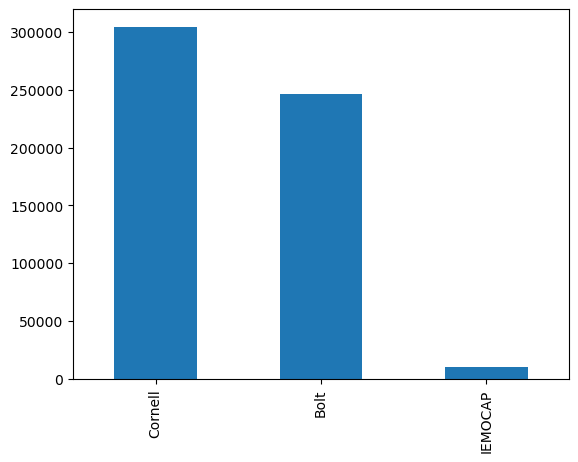

In [55]:
df['source'].value_counts().plot.bar()

In [41]:
val = 2
df1 = df[df["source"] == "IEMOCAP"]
a = ((1/(1+np.exp(-df1.iloc[:, 3:31][df1['27'] < val])))).sum()
b = ((1/(1+np.exp(-df1.iloc[:, 3:31][df1['27'] > val])))).sum()

In [42]:
ab = pd.DataFrame({"a": a, "b": b})

<Axes: >

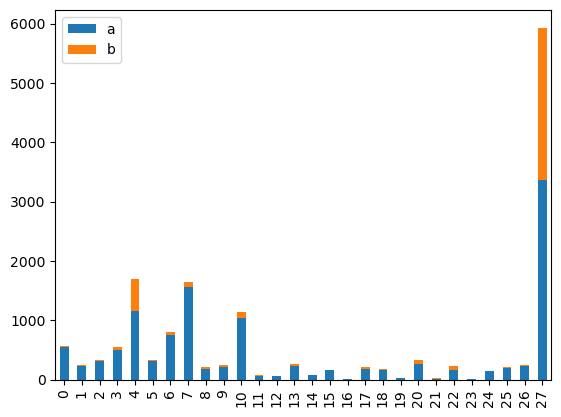

In [43]:
ab.plot.bar(stacked=True)

In [44]:
convs = df.groupby('conversation')

In [45]:
lens = convs['text'].count()

In [46]:
lens.sort_values()

conversation
L535132      1
L127954      1
L129494      1
L129530      1
L133728      1
          ... 
66         108
119        112
92         115
122        136
96         172
Name: text, Length: 83230, dtype: int64

<Axes: >

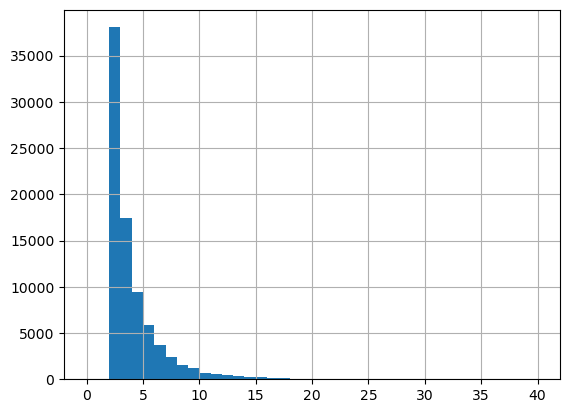

In [47]:
lens.hist(range=[0, 40], bins=40)